## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread("../images/apple.jpeg")
 
new_image = image.copy()
 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

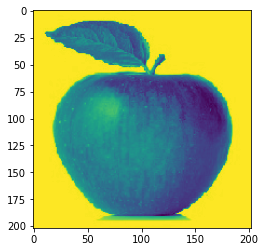

In [3]:
plt.imshow(gray)

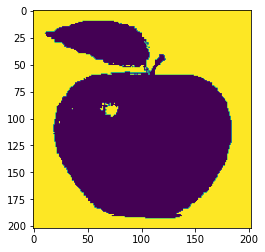

In [4]:
ret, binary = cv2.threshold(gray, 100, 255, 
  cv2.THRESH_OTSU)
 
plt.imshow(binary)

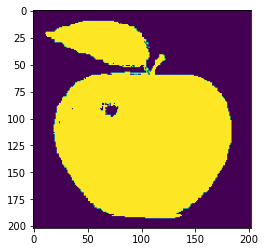

In [5]:
inverted_binary = ~binary
plt.imshow(inverted_binary)

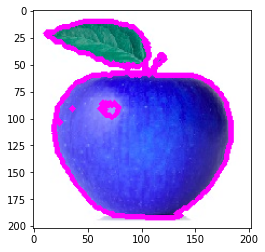

In [6]:
contours, hierarchy = cv2.findContours(inverted_binary,
  cv2.RETR_TREE,
  cv2.CHAIN_APPROX_SIMPLE)
     
with_contours = cv2.drawContours(image, contours, -1,(255,0,255),3)
plt.imshow(with_contours)

In [7]:
print('Total number of contours detected: ' + str(len(contours)))

Total number of contours detected: 19


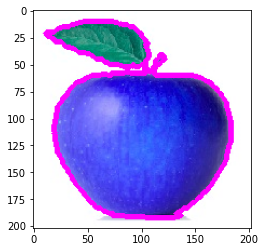

In [8]:
second_contour = cv2.drawContours(new_image, contours, 1,(255,0,255),3)
plt.imshow(second_contour)

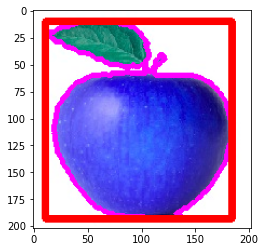

In [9]:
x, y, w, h = cv2.boundingRect(contours[1])
cv2.rectangle(second_contour,(x,y), (x+w,y+h), (255,0,0), 5)
plt.imshow(second_contour)

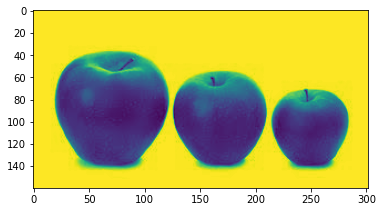

In [10]:
image = cv2.imread("../images/three_apples.jpeg")
 
new_image = image.copy()
 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

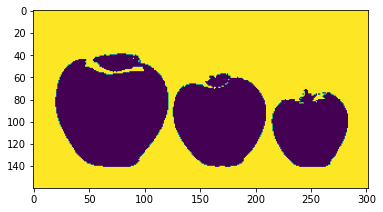

In [11]:
ret, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)
 
plt.imshow(binary)

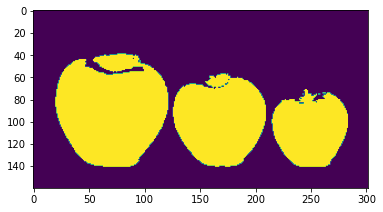

In [12]:
inverted_binary = ~binary
plt.imshow(inverted_binary)

Total number of contours detected: 16


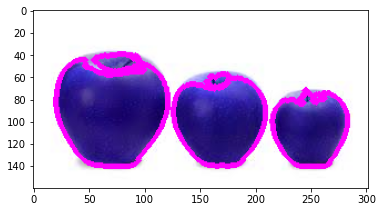

In [13]:
contours, hierarchy = cv2.findContours(inverted_binary,
  cv2.RETR_TREE,
  cv2.CHAIN_APPROX_SIMPLE)
     
with_contours = cv2.drawContours(image, contours, -1,(255,0,255),3)
plt.imshow(with_contours)
print('Total number of contours detected: ' + str(len(contours)))

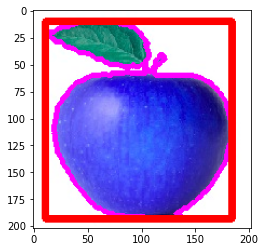

In [14]:
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(second_contour,(x,y), (x+w,y+h), (255,0,0), 5)
plt.imshow(second_contour)

There are 3 apples


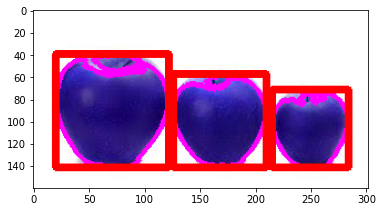

In [15]:
count = 0
for c in contours:
  x, y, w, h = cv2.boundingRect(c)
 
  if (cv2.contourArea(c)) > 10:
    count += 1
    cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
         
plt.imshow(with_contours)
print(f'There are {count} apples')